In [7]:
import os, sys
sys.path.insert(0, os.path.abspath("../src"))

In [1]:
from qudit_sim import backend
from qudit_sim.backend import *
from qudit_sim.circuit import QuantumCircuit
from qudit_sim.utils import *
from qudit_sim.tableau import Tableau
from qudit_sim.predefined_gates import *

backend.show_backend_info()

Array backend: numpy
Precision: complex128
 → Running with NumPy (CPU)


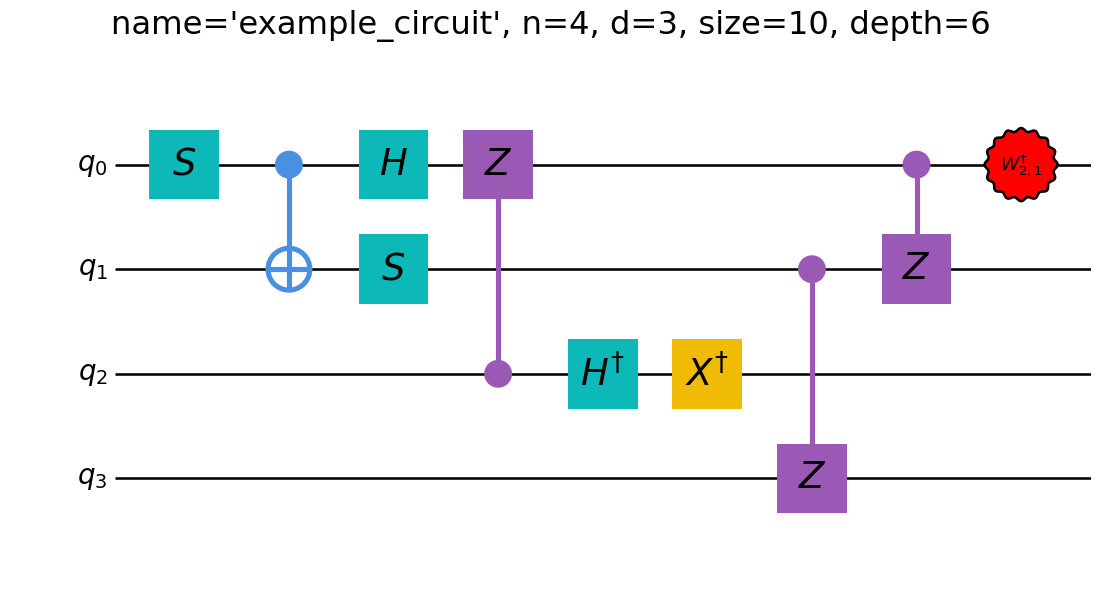

In [4]:
n, d = 4, 3

qc = QuantumCircuit(n, d, name="example_circuit")
qc.S(0)
qc.CX(0, 1)
qc.H(0)
qc.S(1)
qc.CZ(2, 0)
qc.Hdag(2)
qc.Xdag(2)
qc.CZ(1, 3)
qc.CZ(0, 1)
qc.Wdag(0, 2, 7)

qc.draw(show_info=True)

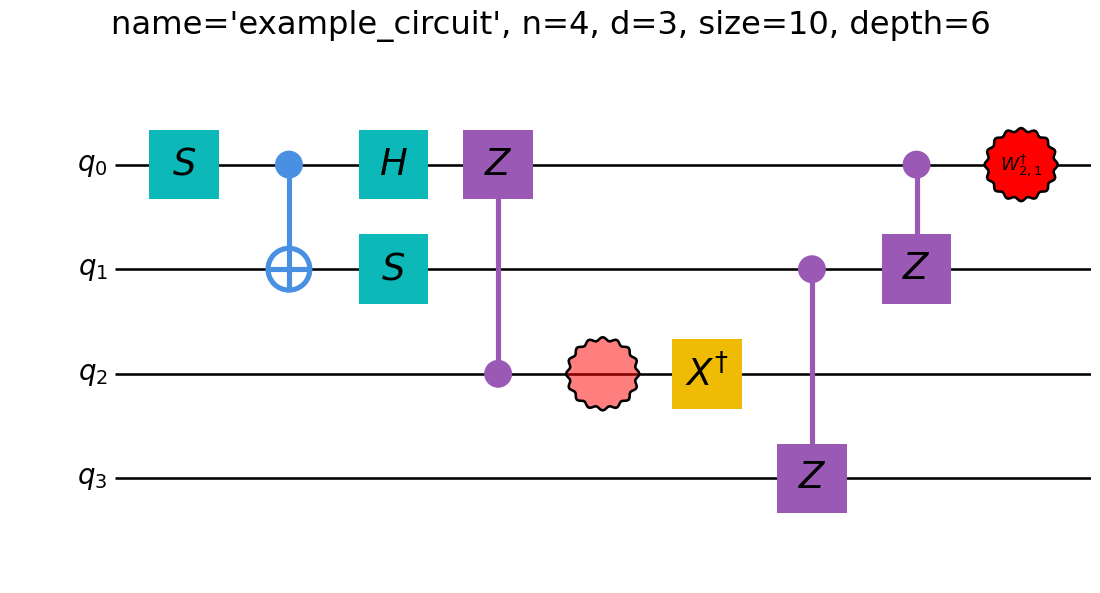

In [5]:
qc.replace_noise_channel((2, 4), 0.5)
qc.draw(show_info=True)

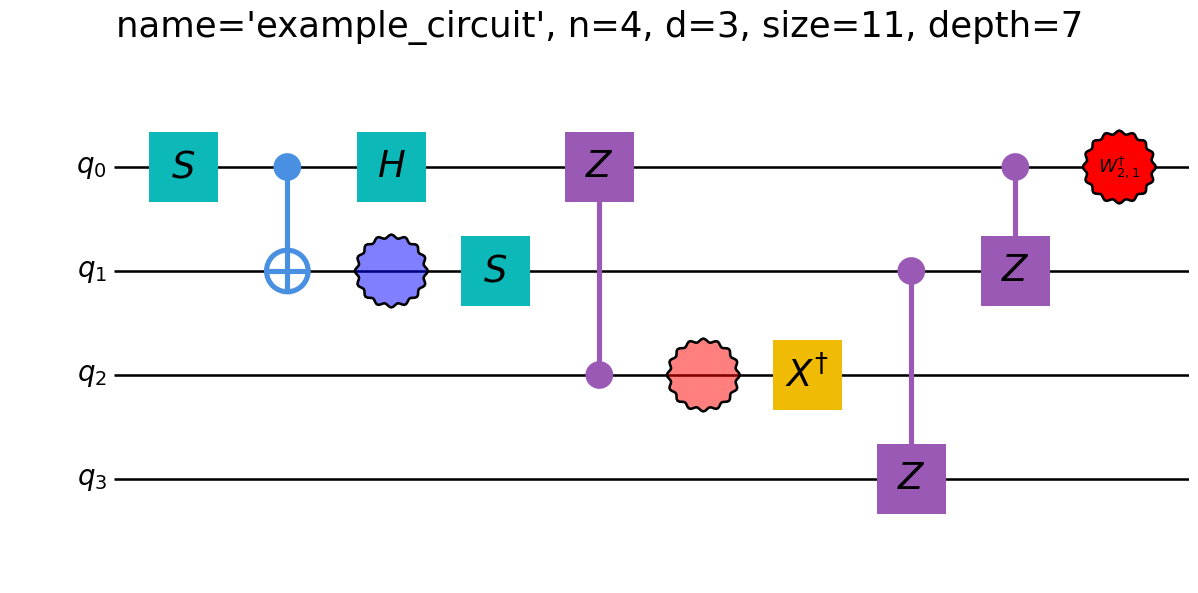

In [6]:
qc.insert_noise_channel((1, 2), 0.5, color="#0000FF")
qc.draw(show_info=True)

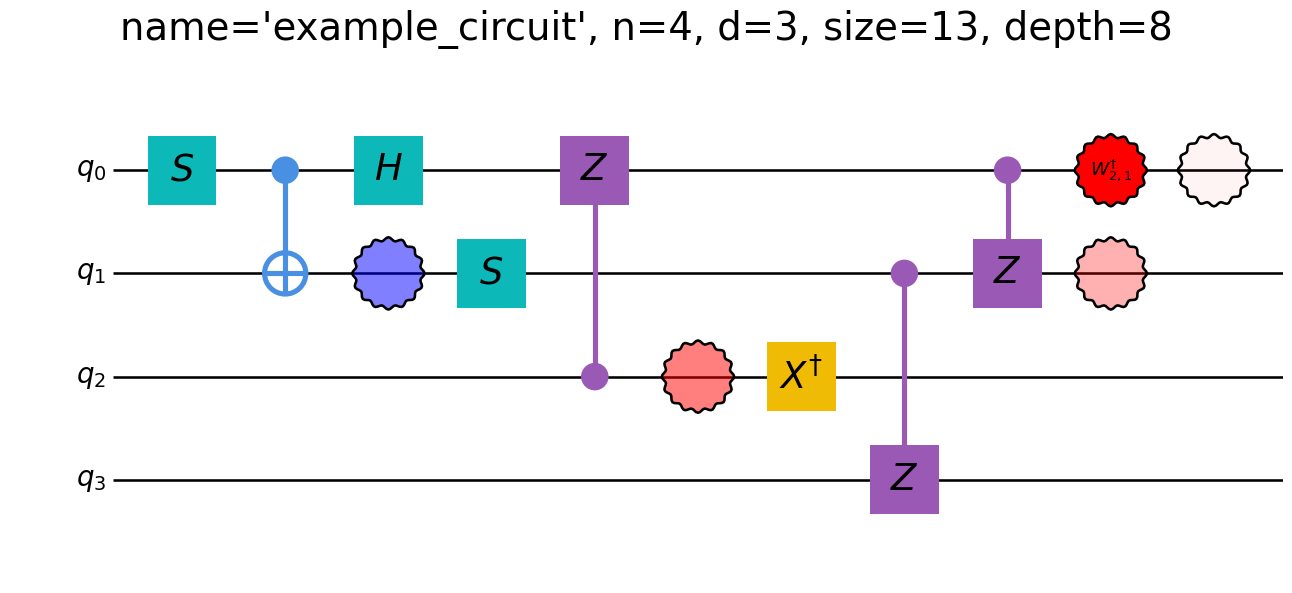

In [7]:
prob_mat = [[1000, 2, 3], [4, 5 ,6], [7, 8, 9]]
qc.add_noise_channel(0, prob_mat)

prob_mat = [[100, 2, 3], [4, 5 ,6], [7, 8, 9]]
qc.add_noise_channel(1, prob_mat)

qc.draw(show_info=True)

In [8]:
print(qc.noise_registry.get(qc[-2][0].model_id))
print(qc.noise_registry.get(qc[-1][0].model_id))

[0.95785441 0.00191571 0.00287356 0.00383142 0.00478927 0.00574713
 0.00670498 0.00766284 0.00862069]
[0.69444444 0.01388889 0.02083333 0.02777778 0.03472222 0.04166667
 0.04861111 0.05555556 0.0625    ]


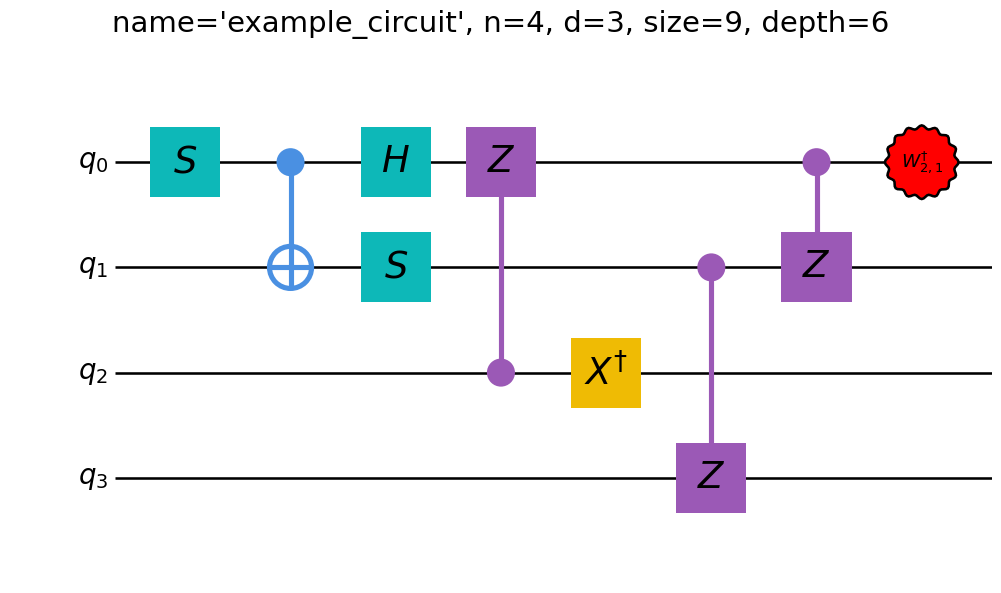

In [9]:
qc.clear_noise()
qc.draw(show_info=True)

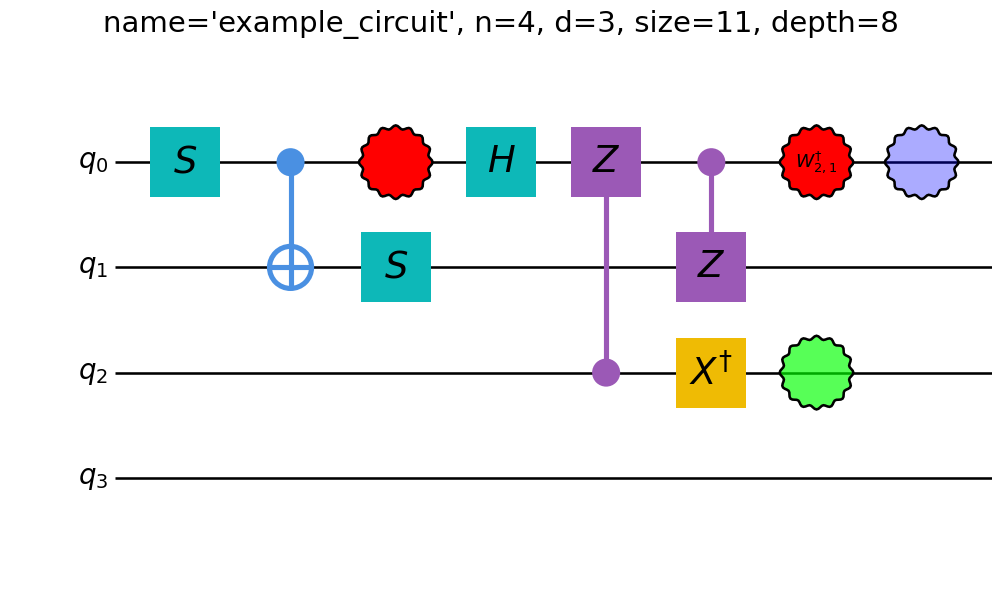

In [10]:
qc.add_noise_channel(0, 0.33, color="#0000FF")
qc.replace_noise_channel(6, 2, 0.66, color="#00FF00")
qc.insert_noise_channel(2, 0, 1, color="#FF0000")

qc.draw(show_info=True)

In [11]:
qc.clear_noise()

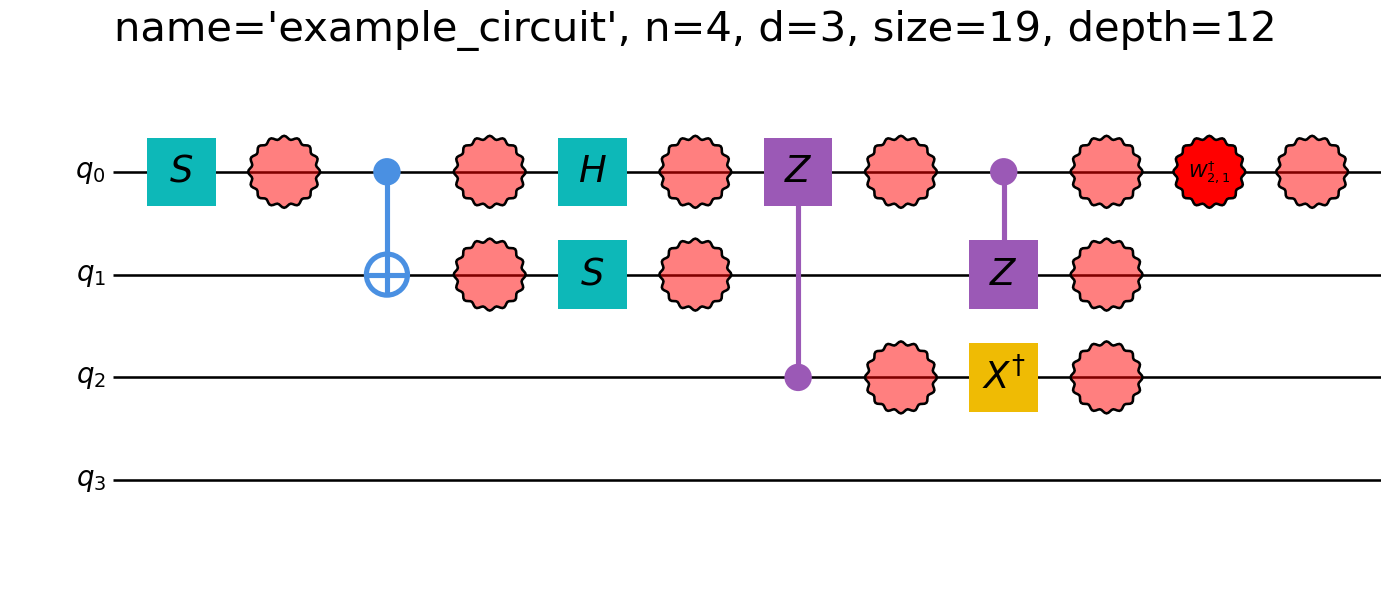

In [12]:
qc.add_noise_global(0.5)

qc.draw(show_info=True)

[(Gate(name='W_0,1', n_qudits=1), 0, 1, (0, 1)), (Gate(name='W_0,0', n_qudits=1), 0, 3, (0, 0)), (Gate(name='W_1,2', n_qudits=1), 1, 4, (1, 2)), (Gate(name='W_0,1', n_qudits=1), 0, 6, (0, 1)), (Gate(name='W_1,1', n_qudits=1), 1, 8, (1, 1)), (Gate(name='W_0,2', n_qudits=1), 2, 10, (0, 2)), (Gate(name='W_0,0', n_qudits=1), 0, 11, (0, 0)), (Gate(name='W_0,0', n_qudits=1), 2, 13, (0, 0)), (Gate(name='W_0,0', n_qudits=1), 0, 15, (0, 0)), (Gate(name='W_0,0', n_qudits=1), 1, 16, (0, 0)), (Gate(name='W_2,0', n_qudits=1), 0, 18, (2, 0))]


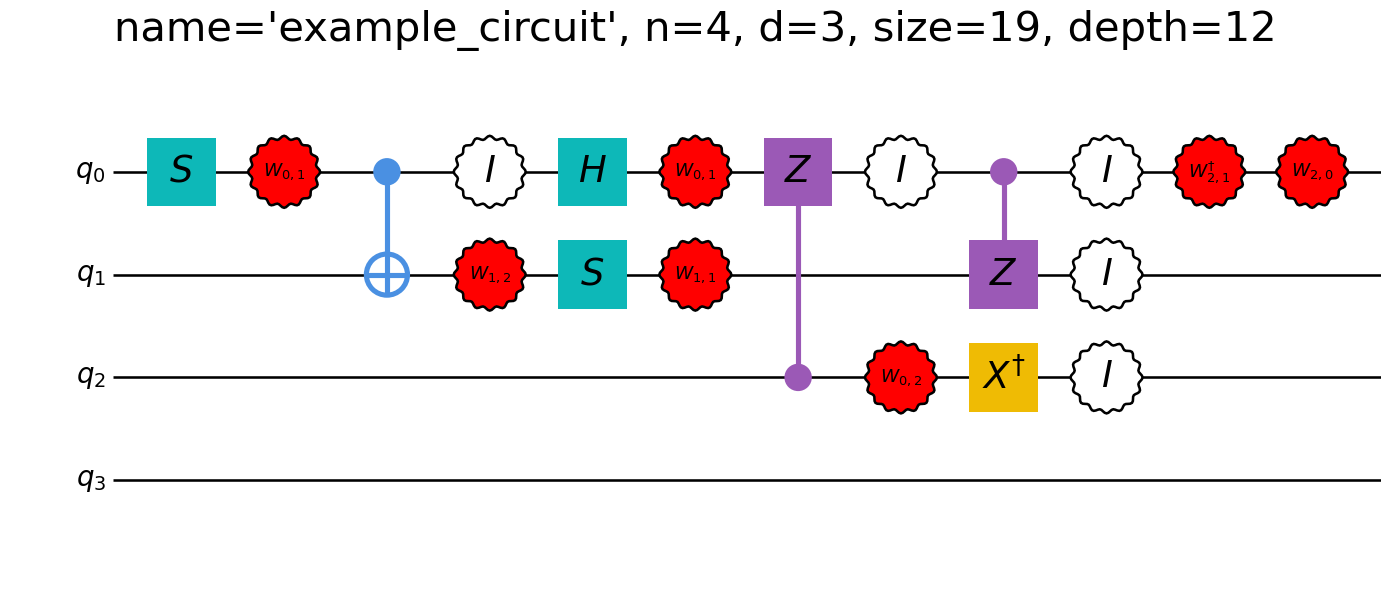

In [13]:
qc_new, ret = qc.realize_noise(seed=None, show_identities=True, in_place=False)
print(ret)

qc_new.draw(show_info=True)

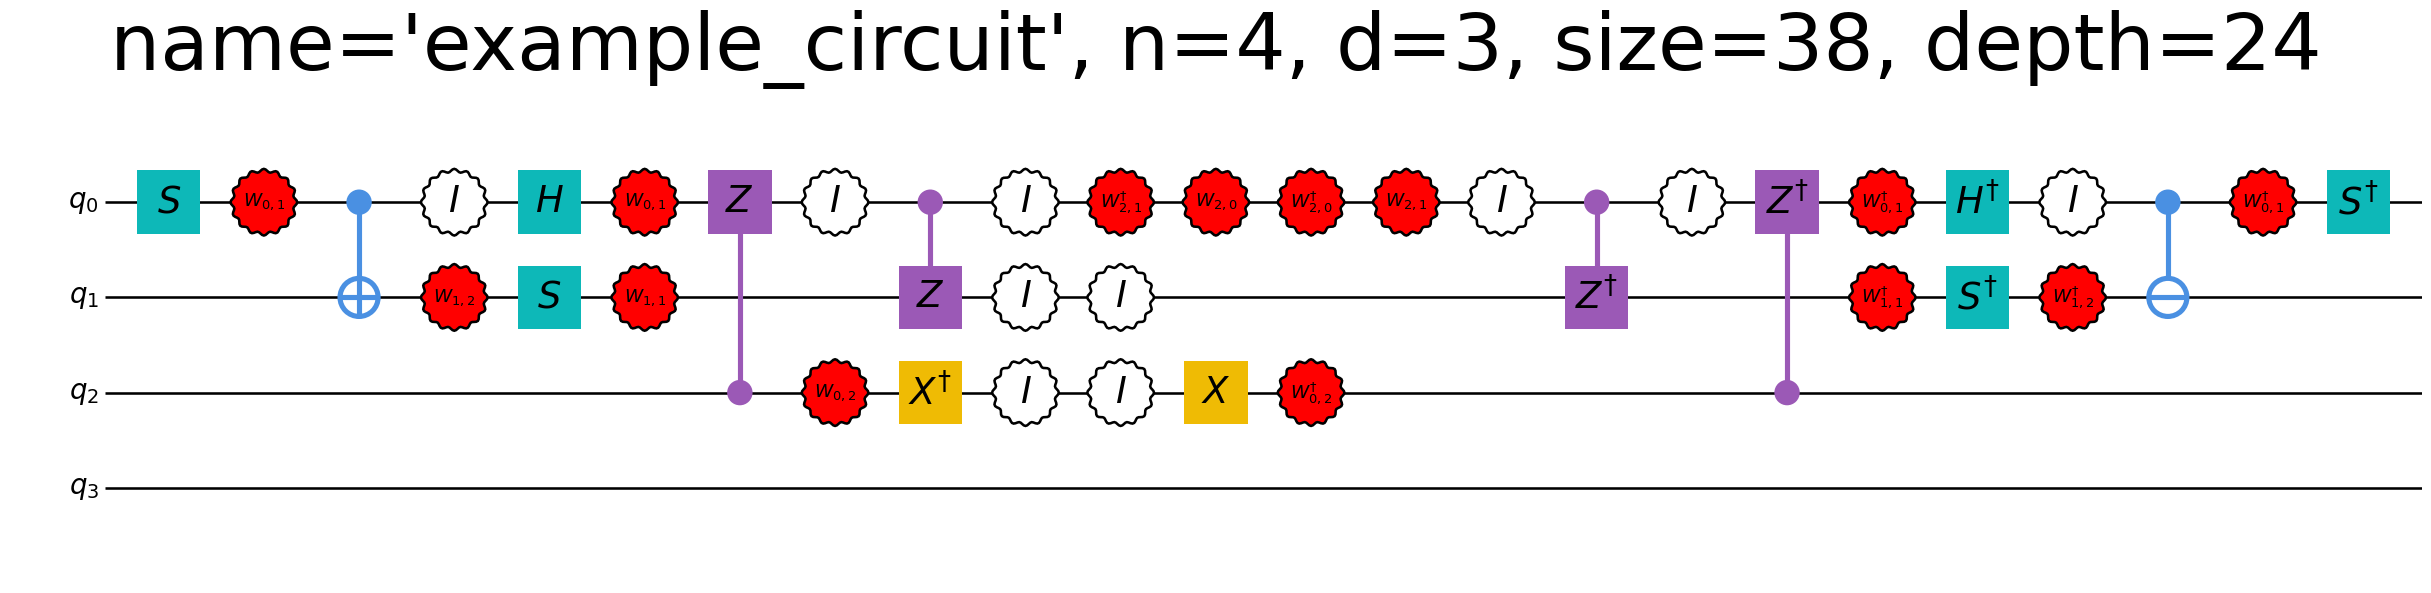

In [14]:
qc2 = qc_new.copy()
qc2.reverse(in_place=True)
qc_new.compose(qc2, in_place=True)

qc_new.draw(show_info=True)

In [15]:
tab = Tableau(n=n, d=d, full=True)
tab.apply_circuit(qc_new, print_tableau=False)
print('Tableau:')
print(tab)
print('\nStabilizers:')
tab.print_stabilizers()

Tableau:
#  | x0 x1 x2 x3 | z0 z1 z2 z3 | τ
──────────────────────────────────
d0 |  1  0  0  0 |  0  0  0  0 | 0
d1 |  0  1  0  0 |  0  0  0  0 | 0
d2 |  0  0  1  0 |  0  0  0  0 | 0
d3 |  0  0  0  1 |  0  0  0  0 | 0
----------------------------------
s0 |  0  0  0  0 |  1  0  0  0 | 0
s1 |  0  0  0  0 |  0  1  0  0 | 0
s2 |  0  0  0  0 |  0  0  1  0 | 0
s3 |  0  0  0  0 |  0  0  0  1 | 0

Stabilizers:
#  | phase | 0 | 1 | 2 | 3
──────────────────────────
d0 | 1     | X | I | I | I
d1 | 1     | I | X | I | I
d2 | 1     | I | I | X | I
d3 | 1     | I | I | I | X
--------------------------
s0 | 1     | Z | I | I | I
s1 | 1     | I | Z | I | I
s2 | 1     | I | I | Z | I
s3 | 1     | I | I | I | Z


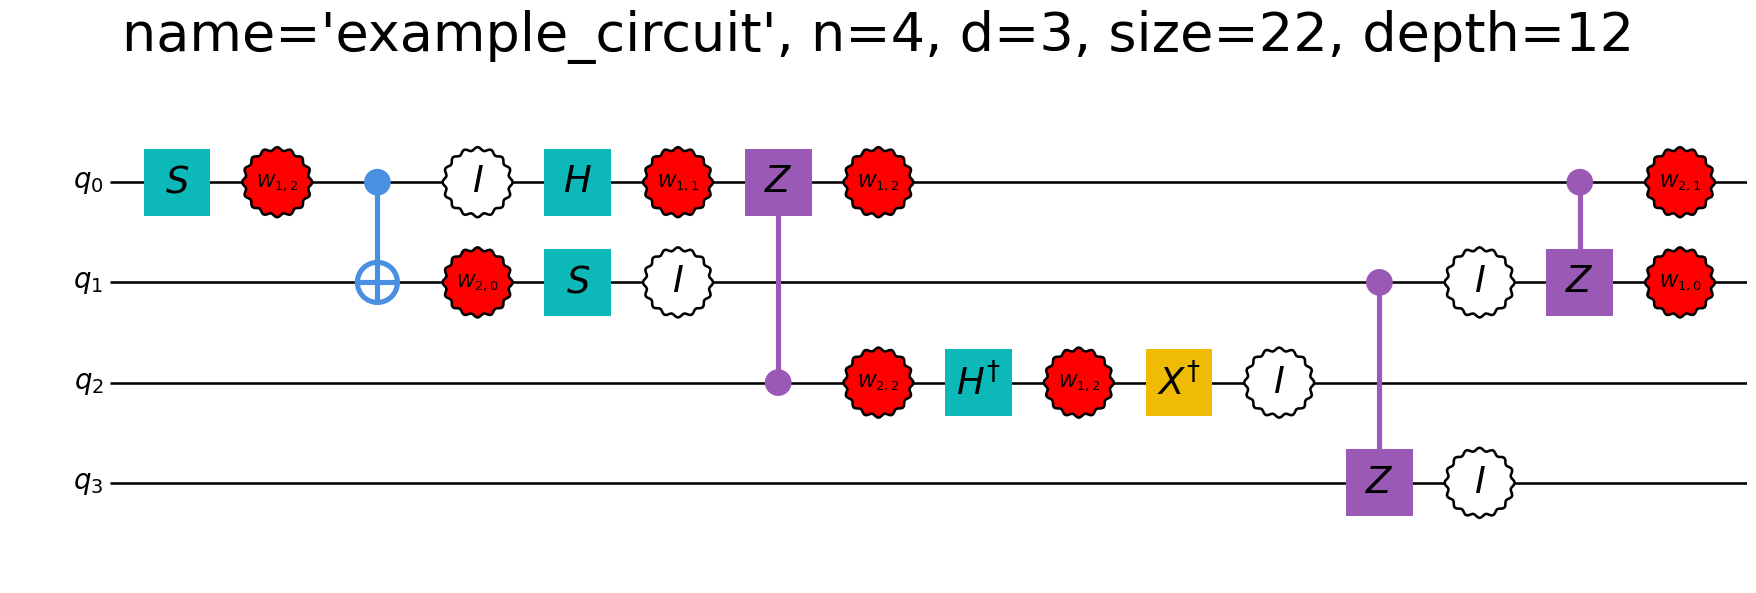

In [16]:
n, d = 4, 3

qc = QuantumCircuit(n, d, name="example_circuit")
qc.S(0)
qc.CX(0, 1)
qc.H(0)
qc.S(1)
qc.CZ(2, 0)
qc.Hdag(2)
qc.Xdag(2)
qc.CZ(1, 3)
qc.CZ(0, 1)

qc.add_noise_global(0.5)
qc.realize_noise(seed=42, show_identities=True, in_place=True)

qc.draw(show_info=True)

In [17]:
tab = Tableau(n=n, d=d, full=True)
tab.apply_circuit(qc, print_tableau=False)
print('Tableau:')
print(tab)
print('\nStabilizers:')
tab.print_stabilizers()

Tableau:
#  | x0 x1 x2 x3 | z0 z1 z2 z3 | τ
──────────────────────────────────
d0 |  2  1  2  0 |  2  0  0  1 | 2
d1 |  0  1  0  0 |  1  1  0  1 | 0
d2 |  0  0  0  0 |  1  0  2  0 | 4
d3 |  0  0  0  1 |  0  1  0  0 | 4
----------------------------------
s0 |  2  0  2  0 |  0  2  0  0 | 4
s1 |  1  0  1  0 |  0  2  0  0 | 0
s2 |  0  0  1  0 |  0  0  0  0 | 0
s3 |  0  0  0  0 |  0  0  0  1 | 0

Stabilizers:
#  | phase | 0    | 1  | 2  | 3
───────────────────────────────
d0 | τ²    | X²Z² | X  | X² | Z
d1 | 1     | Z    | XZ | I  | Z
d2 | τ⁴    | Z    | I  | Z² | I
d3 | τ⁴    | I    | Z  | I  | X
-------------------------------
s0 | τ⁴    | X²   | Z² | X² | I
s1 | 1     | X    | Z² | X  | I
s2 | 1     | I    | I  | X  | I
s3 | 1     | I    | I  | I  | Z


In [18]:
%%time

tab.to_probvector(1e4)

CPU times: total: 4.5 s
Wall time: 4.51 s


array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.1081, 0.    , 0.    , 0.1185, 0.    , 0.    , 0.1122,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.1088, 0.    , 0.    , 0.109 ,
       0.    , 0.    , 0.1112, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1131,
       0.    , 0.    , 0.111 , 0.    , 0.    , 0.1081, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    ])

In [19]:
%%time

tab.to_probvector_fast(1e4)

CPU times: total: 15.6 ms
Wall time: 16.6 ms


array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.1113, 0.    , 0.    , 0.1132, 0.    , 0.    , 0.1086,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.1143, 0.    , 0.    , 0.1138,
       0.    , 0.    , 0.1074, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1133,
       0.    , 0.    , 0.11  , 0.    , 0.    , 0.1081, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    ])

In [20]:
%%time




tab.to_probvector_exact()

CPU times: total: 0 ns
Wall time: 3 ms


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.11111111,
       0.        , 0.        , 0.11111111, 0.        , 0.        ,
       0.11111111, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11111111, 0.        , 0.        , 0.11111111,
       0.        , 0.        , 0.11111111, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11111111, 0.        ,
       0.        , 0.11111111, 0.        , 0.        , 0.11111111,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
abs(qc.execute(print_state=False)[0]) ** 2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.11111111,
       0.        , 0.        , 0.11111111, 0.        , 0.        ,
       0.11111111, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11111111, 0.        , 0.        , 0.11111111,
       0.        , 0.        , 0.11111111, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11111111, 0.        ,
       0.        , 0.11111111, 0.        , 0.        , 0.11111111,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
n, d = 100, 7
rc = random_circuit(n, d, 1000, 1000, seed=None)

In [23]:
tab1 = Tableau(n, d, full=True)
tab1.apply_circuit(rc)

Tableau(n=100, d=7, full=True, rows=200)

In [24]:
%%time

tab1.sample_measurements(10000)

CPU times: total: 250 ms
Wall time: 248 ms


array([[0, 4, 1, ..., 4, 0, 6],
       [2, 4, 4, ..., 0, 3, 6],
       [2, 4, 3, ..., 5, 3, 6],
       ...,
       [4, 4, 4, ..., 5, 2, 6],
       [1, 4, 6, ..., 3, 6, 6],
       [0, 4, 4, ..., 5, 1, 6]], dtype=int64)

In [25]:
n, d = 1000, 7
rc = random_circuit(n, d, 1000, 1000, seed=None)

In [26]:
tab1 = Tableau(n, d, full=True)
tab1.apply_circuit(rc)

Tableau(n=1000, d=7, full=True, rows=2000)

In [27]:
%%time

tab1.sample_measurements(10000)

CPU times: total: 4.55 s
Wall time: 4.56 s


array([[1, 0, 0, ..., 0, 6, 0],
       [1, 0, 0, ..., 0, 6, 0],
       [1, 0, 0, ..., 0, 6, 0],
       ...,
       [1, 0, 0, ..., 0, 6, 0],
       [1, 0, 0, ..., 0, 6, 0],
       [1, 0, 0, ..., 0, 6, 0]], dtype=int64)

In [28]:
n, d = 10, 7
rc = random_circuit(n, d, 100, 100, seed=777)

tab1 = Tableau(n, d, full=True)
tab1.apply_circuit(rc)

Tableau(n=10, d=7, full=True, rows=20)

In [29]:
print(tab1)

#  | x0 x1 x2 x3 x4 x5 x6 x7 x8 x9 | z0 z1 z2 z3 z4 z5 z6 z7 z8 z9 |  τ
───────────────────────────────────────────────────────────────────────
d0 |  0  0  0  0  0  0  0  0  0  0 |  6  0  1  1  0  6  0  0  1  6 |  6
d1 |  0  1  0  0  0  0  0  1  0  0 |  6  3  1  1  6  0  0  6  1  0 |  2
d2 |  0  0  1  6  0  0  0  0  0  0 |  6  1  5  6  6  6  1  6  2  6 |  8
d3 |  0  0  0  0  0  0  0  0  0  0 |  0  0  1  1  0  0  0  0  0  0 |  0
d4 |  0  0  0  0  6  6  0  1  0  1 |  1  0  0  0  0  0  6  0  0  0 | 10
d5 |  0  0  0  0  0  0  0  0  0  0 |  0  0  0  0  6  1  0  0  6  0 | 12
d6 |  0  0  1  6  0  0  1  0  0  0 |  1  0  0  0  1  6  6  0  1  6 |  8
d7 |  0  0  0  0  0  1  0  0  1  0 |  1  4  1  0  4  0  6  4  5  0 |  8
d8 |  0  0  0  0  0  1  0  1  1  0 |  1  1  0  0  6  0  0  6  2  0 |  2
d9 |  6  0  0  0  0  6  6  6  6  1 |  4  1  6  0  0  0  0  0  5  0 |  4
-----------------------------------------------------------------------
s0 |  1  0  0  0  0  0  1  6  0  0 |  1  1  1  0  6  6  6  6  4 

In [30]:
%%time

tab1.sample_measurements(10000)

CPU times: total: 0 ns
Wall time: 7 ms


array([[2, 6, 6, ..., 6, 0, 5],
       [2, 6, 4, ..., 3, 2, 5],
       [5, 6, 1, ..., 4, 1, 5],
       ...,
       [4, 6, 4, ..., 4, 2, 5],
       [2, 6, 3, ..., 5, 2, 3],
       [4, 6, 0, ..., 4, 2, 5]], dtype=int64)

In [31]:
print(tab1)

#  | x0 x1 x2 x3 x4 x5 x6 x7 x8 x9 | z0 z1 z2 z3 z4 z5 z6 z7 z8 z9 |  τ
───────────────────────────────────────────────────────────────────────
d0 |  0  0  0  0  0  0  0  0  0  0 |  6  0  1  1  0  6  0  0  1  6 |  6
d1 |  0  1  0  0  0  0  0  1  0  0 |  6  3  1  1  6  0  0  6  1  0 |  2
d2 |  0  0  1  6  0  0  0  0  0  0 |  6  1  5  6  6  6  1  6  2  6 |  8
d3 |  0  0  0  0  0  0  0  0  0  0 |  0  0  1  1  0  0  0  0  0  0 |  0
d4 |  0  0  0  0  6  6  0  1  0  1 |  1  0  0  0  0  0  6  0  0  0 | 10
d5 |  0  0  0  0  0  0  0  0  0  0 |  0  0  0  0  6  1  0  0  6  0 | 12
d6 |  0  0  1  6  0  0  1  0  0  0 |  1  0  0  0  1  6  6  0  1  6 |  8
d7 |  0  0  0  0  0  1  0  0  1  0 |  1  4  1  0  4  0  6  4  5  0 |  8
d8 |  0  0  0  0  0  1  0  1  1  0 |  1  1  0  0  6  0  0  6  2  0 |  2
d9 |  6  0  0  0  0  6  6  6  6  1 |  4  1  6  0  0  0  0  0  5  0 |  4
-----------------------------------------------------------------------
s0 |  1  0  0  0  0  0  1  6  0  0 |  1  1  1  0  6  6  6  6  4 